<a href="https://colab.research.google.com/github/Eze-ar/Python.Pandas-Analisis_Diabetes/blob/main/EstudioDiabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive #para trabajar con el csv en el drive

In [ ]:
drive.mount('/content/drive') #monto el drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/PROGRAMACION/Python/No Country - Simulación DATA [2024]/diabetes_prediction_dataset.csv', sep=';')

Vemos las columnas presentes en el data frame así como las primeras 5 filas:

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Para saber cuántas filas y columnas tiene el data frame utilizamos:

In [ ]:
df.shape

(100000, 9)

y vemos que tenemos 9 columnas, que habíamos ya visto antes, y 100.000 filas o casos bajo estudio

Podemos también ver más detalle o información sobre las columnas y sus tipos de datos asociados:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


**Cantidad de fumadores según género**

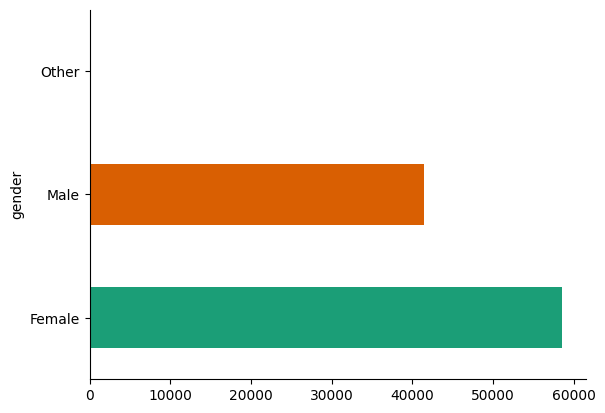

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

**Cantidad de sujetos bajo estudio según su EDAD**

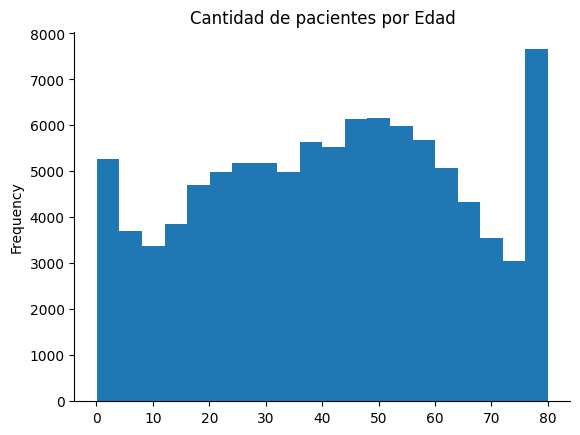

In [ ]:
df['age'].plot(kind='hist', bins=20, title='Cantidad de pacientes por Edad')
plt.gca().spines[['top', 'right',]].set_visible(False)

Vamos a bucar correlaciones entre las variables

In [ ]:
# Calcular correlaciones
matriz_de_correlacion = df.corr()
matriz_de_correlacion

<ipython-input-5-b5e1cceb95cc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_de_correlacion = df.corr()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


Pero no está presente ni el género ni su historial de fumador, ello por ser variables categóricas, no numéricas.

En principio procedamos con el género, viendo si hay registros que no sean ni masculinos ni femeninos, ello sin entrar en discursión no resultarían útiles desde el estudio genético en el que distinguimos médicamente sólo 2 géneros, nuevamente sin entrar a polemizar por elecciones individuales ya que aquí nos interesa lo estrictamente genético

---



In [ ]:
df[~df['gender'].isin(['Male', 'Female'])]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
12669,Other,10.0,0,0,not current,14.09,5.0,140,0
14838,Other,19.0,0,0,No Info,27.32,5.7,158,0
16702,Other,39.0,0,0,not current,31.24,6.2,85,0
18691,Other,10.0,0,0,not current,16.59,6.1,160,0
23266,Other,23.0,0,0,No Info,24.23,6.1,140,0
31985,Other,53.0,0,0,No Info,27.32,6.6,160,0
33805,Other,45.0,0,0,never,27.32,4.0,159,0
34929,Other,47.0,0,0,never,36.76,6.6,90,0
35006,Other,47.0,0,0,never,36.76,3.5,200,0
40337,Other,18.0,0,0,not current,30.19,6.1,90,0


Por lo antedicho procedemos a borrar aquellos registros que no están enmarcado dentro de los 2 sexos genéticos y en todo caso estos registro serán para ulteriores análisis que escapan al alcance del presente proyecto

In [ ]:
len(df[~df['gender'].isin(['Male', 'Female'])]) #voy a borrar estos 18 registros

18

In [ ]:
df = df[df['gender'].isin(['Male', 'Female'])]
len(df)

99982

Ahora que tengo sólo 2 sexos genero variables dummy

In [ ]:
# Crear variables dummy para la columna 'gender'
df = pd.get_dummies(df, columns=['gender'], drop_first=True)
df.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male
0,80.0,0,1,never,25.19,6.6,140,0,0
1,54.0,0,0,No Info,27.32,6.6,80,0,0
2,28.0,0,0,never,27.32,5.7,158,0,1
3,36.0,0,0,current,23.45,5.0,155,0,0
4,76.0,1,1,current,20.14,4.8,155,0,1


Resulta que ahora tengo la columna "gender_male" cuyos registros serán 0 y 1 en lugar de "gender"

Se aplica el mismo concepto para la columna **smoking_history** donde sólo interesa si es fumador o no lo es

En principio veamos cuáles son los valores de dicho campo:

In [ ]:
lista_estado_fumador = df['smoking_history'].unique()
lista_estado_fumador = list(lista_estado_fumador)
lista_estado_fumador

['never', 'No Info', 'current', 'former', 'ever', 'not current']

Podemos eliminar los registros 'No info'

In [ ]:
lista_estado_fumador.remove('No Info')
lista_estado_fumador

['never', 'current', 'former', 'ever', 'not current']

In [ ]:
df = df[df['smoking_history'].isin(lista_estado_fumador)]
df.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male
0,80.0,0,1,never,25.19,6.6,140,0,0
2,28.0,0,0,never,27.32,5.7,158,0,1
3,36.0,0,0,current,23.45,5.0,155,0,0
4,76.0,1,1,current,20.14,4.8,155,0,1
5,20.0,0,0,never,27.32,6.6,85,0,0


Partiendo de un campo 'smoking_history' lo que quiero lograr es obtener tantas dummy vars como valores diferentes puede ese campo tener, con lo que pasaré de 1 campo a 6

In [ ]:
df = pd.get_dummies(df, columns=['smoking_history'], prefix='smoking')
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,smoking_current,smoking_ever,smoking_former,smoking_never,smoking_not current
0,80.0,0,1,25.19,6.6,140,0,0,0,0,0,1,0
2,28.0,0,0,27.32,5.7,158,0,1,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,1,1,0,0,0,0
5,20.0,0,0,27.32,6.6,85,0,0,0,0,0,1,0


Planteo nuevamente la correlación para padecer de diabetes

In [ ]:
df.corr()['diabetes']

age                    0.260850
hypertension           0.192226
heart_disease          0.169614
bmi                    0.204421
HbA1c_level            0.438897
blood_glucose_level    0.449698
diabetes               1.000000
gender_Male            0.056997
smoking_current       -0.010143
smoking_ever           0.006693
smoking_former         0.079555
smoking_never         -0.050770
smoking_not current   -0.002819
Name: diabetes, dtype: float64

Teniendo presente que una correlación fuerte es 1 (o -1 si es correlación inversa) y 0 si no hay correlación obtuvimos que las correlaciones más altas con la diabetes se da, en el siguiente orden con las siguientes variables: nivel de glucosa en sangre, nivel HbA1c(*), edad, índice de masa corporal, hipertensión y enfermedad cardíaca. Tener en cuenta que correlación no implica causalidad, así que seguiremos estudiando.


(*) El nivel de HbA1c, también conocido como hemoglobina A1c o simplemente A1c, es una medida de la concentración promedio de glucosa en sangre durante un período de tiempo más prolongado, generalmente en los últimos 2 a 3 meses.

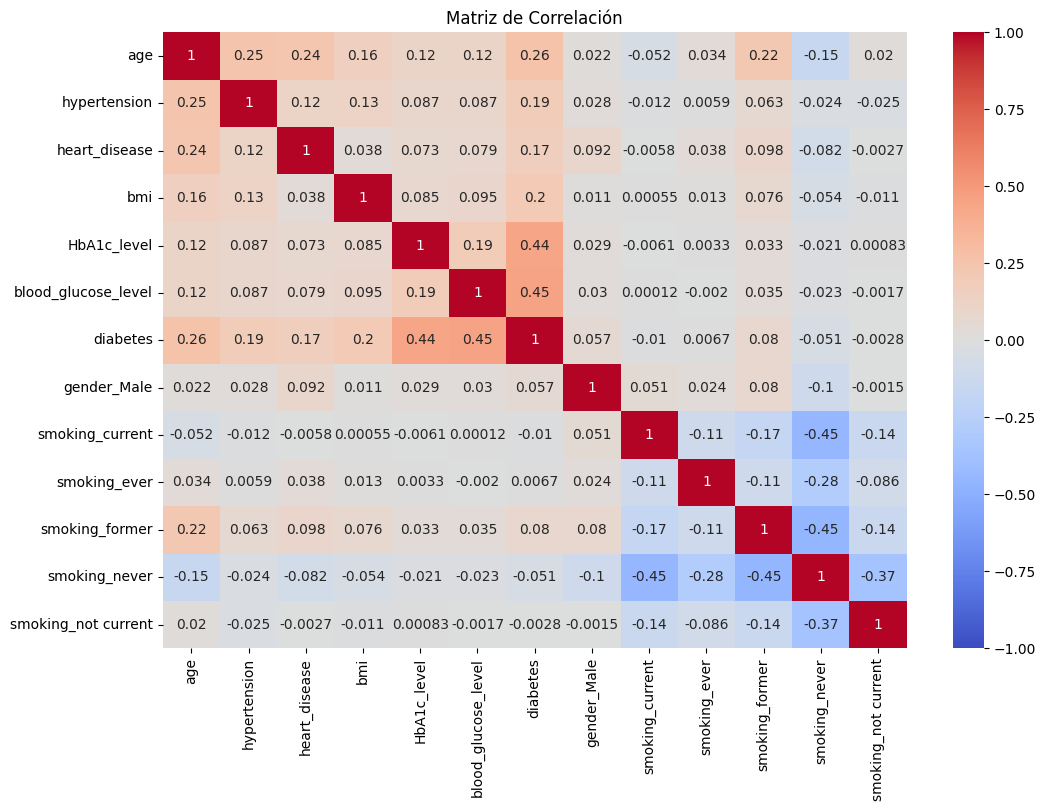

In [ ]:
matriz_de_correlacion = df.corr()

# Creo un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_de_correlacion, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

<ipython-input-21-b875f23b570c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlacion_diabetes.values, y=correlacion_diabetes.index, palette='viridis')


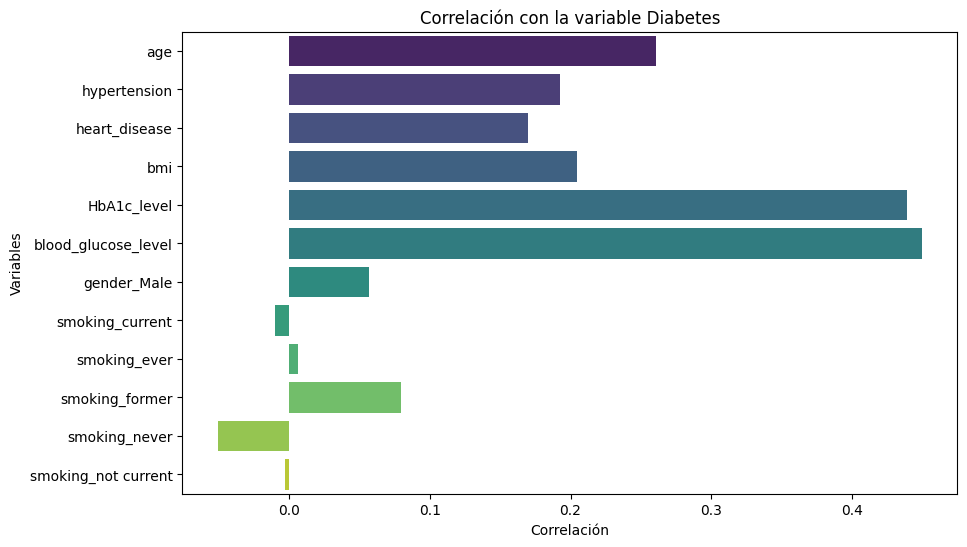

In [ ]:
#Si se quiere analizar la correlación con 'diabetes'
correlacion_diabetes = matriz_de_correlacion['diabetes'].drop('diabetes')  # Excluir la correlación consigo misma

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=correlacion_diabetes.values, y=correlacion_diabetes.index, palette='viridis')
plt.title('Correlación con la variable Diabetes')
plt.xlabel('Correlación')
plt.ylabel('Variables')
plt.show()